Frame Captured


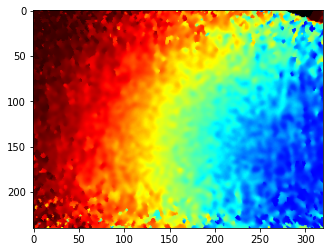

5861939.128422737


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pyrealsense2 as rs

# start pipeline

pipe = rs.pipeline()
cfg = rs.config()
cfg.enable_stream(rs.stream.depth, 320, 240, rs.format.z16, 30)

profile = pipe.start(cfg)

# for x in range(5):
#     pipe.wait_for_frames()

frameset = pipe.wait_for_frames()
depth_frame = frameset.get_depth_frame()

pipe.stop()
print('Frame Captured')

colorizer = rs.colorizer()
colorized_depth = np.asanyarray(colorizer.colorize(depth_frame).get_data())
plt.imshow(colorized_depth)
plt.show()

Volume = 0
pixel_size=100 # need to be modified
matrix = [[0]*240]*320
for i in range(320):
    for j in range(240):
        matrix[i][j]=depth_frame.get_distance(i,j)
        Volume+=matrix[i][j] * pixel_size

print(Volume)